In [168]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import roots_legendre, roots_chebyt, jv, roots_sh_legendre
from scipy.interpolate import splrep, splev

In [169]:
%matplotlib inline

!pip install import-ipynb

In [170]:
import import_ipynb

In [171]:
from week_6_calculus import midpoint_rule_test

## Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. Если функция $f(x)$ является полиномом, тогда такой метод интегрирования даст *точное* решение интеграла.

Например, давайте посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

###  Задание 1.1

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками". Сравните его с полученным численным значением.

In [172]:
def f_1(x):
    return (7 * x ** 3 - 8 * x ** 2 - 3 * x + 3)

In [173]:
ground_truth_1_1 = 2 / 3
roots, w = roots_legendre(3) # 3 --- степень полинома
print ('Ground truth: {:2f} \nAlgorithm result: {:2f}'.format(ground_truth_1_1, f_1(roots) @ w))

Ground truth: 0.666667 
Algorithm result: 0.666667


2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в week_6_calculus). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [174]:
midpoint_result = midpoint_rule_test(f_1, -1, 1, 1e-10)
print('Counted with midpoint rule the intagral equals to {:5f}, {} nodes required.'.format(midpoint_result[0], 2 * midpoint_result[1][-1]))

Counted with midpoint rule the intagral equals to 0.666667, 524288 nodes required.


3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя корни полинома Лежандра степени от 1 до 6 в качестве узлов (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [175]:
print('Ground truth: {:5f}'.format(ground_truth_1_1))
for i in range(1, 7):
    roots, w = roots_legendre(i)
    int_result = f_1(roots) @ w
    print('Degree: {}, integral result: {:5f}, difference: {:.2e}'.format(i, int_result, int_result - ground_truth_1_1))

Ground truth: 0.666667
Degree: 1, integral result: 6.000000, difference: 5.33e+00
Degree: 2, integral result: 0.666667, difference: 7.77e-16
Degree: 3, integral result: 0.666667, difference: -2.78e-15
Degree: 4, integral result: 0.666667, difference: 1.11e-16
Degree: 5, integral result: 0.666667, difference: 1.89e-15
Degree: 6, integral result: 0.666667, difference: 2.55e-15


Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

(20% итоговой оценки)

Число небходимых точек, как и ожидалось, сильно ниже, чем то, которое потребовалось для интегрирования с помощью ```midpoint_rule```.

###  Задание 1.2

Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* (преобразование не меняет область интегрирования) для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

Собственно, проведем требуемое афинное преобразование. Для этого введем $y = \dfrac{x-5}{5}$. Интеграл при этом примет следующий вид:

$$
5 \int\limits_{-1}^{1} dy \; \left[7 \cdot (5 y + 5)^3 - 8 \cdot (5 y + 5)^2 - 3 \cdot (5 y + 5) + 3\right]
$$

In [176]:
def f_2(x):
    return 5 * f_1(5 * x + 5)

In [177]:
ground_truth_1_2 = 44140 / 3
print('Ground truth: {:5f}'.format(ground_truth_1_2))
for i in range(1, 7):
    roots, w = roots_legendre(i)
    int_result = f_2(roots) @ w
    print('Degree: {}, integral result: {:5f}, difference: {:.2e}'.format(i, int_result, int_result - ground_truth_1_2))

Ground truth: 14713.333333
Degree: 1, integral result: 6630.000000, difference: -8.08e+03
Degree: 2, integral result: 14713.333333, difference: 1.82e-12
Degree: 3, integral result: 14713.333333, difference: -1.82e-12
Degree: 4, integral result: 14713.333333, difference: 1.82e-12
Degree: 5, integral result: 14713.333333, difference: -1.82e-12
Degree: 6, integral result: 14713.333333, difference: 1.82e-12


Сравните результат с точным значением интеграла.
* Удивительно, но результаты сходятся.

### Задание 1.3

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{\cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит ошибку плавающей точки.

(20% итоговой оценки)

Нас вновь не устраивают переделы интегрирования, поэтому сделаем следующее:

1. Видно, что подынтегральное выражение четное, поэтому заменим интеграл на половину его самого в симметричных пределах:

$$
\frac{1}{2} \int\limits_{-2\pi}^{2\pi} \frac{\cos(x) dx}{\sqrt{4\pi^2 - x^2}}
$$

2. Теперь введем $y = \dfrac{x}{2\pi}$, тогда интеграл получит вид:

$$
\frac{1}{2} \int\limits_{-1}^{1} \frac{\cos(2\pi y) dy}{\sqrt{1 - y^2}}
$$



In [178]:
def f_3(x):
    return np.cos(2 * np.pi * x) / 2

In [179]:
ground_truth_1_3 = np.pi / 2 * jv(0, 2 * np.pi)
for i in range(1, 20):
    roots, w = roots_chebyt(i)
    int_result = f_3(roots) @ w
    print('Degree: {}, integral result: {:5f}, difference: {:.2e}'.format(i, int_result, int_result - ground_truth_1_3))

Degree: 1, integral result: 1.570796, difference: 1.22e+00
Degree: 2, integral result: -0.418233, difference: -7.64e-01
Degree: 3, integral result: 1.221169, difference: 8.75e-01
Degree: 4, integral result: 0.115754, difference: -2.30e-01
Degree: 5, integral result: 0.377861, difference: 3.19e-02
Degree: 6, integral result: 0.343235, difference: -2.78e-03
Degree: 7, integral result: 0.346178, difference: 1.68e-04
Degree: 8, integral result: 0.346003, difference: -7.49e-06
Degree: 9, integral result: 0.346010, difference: 2.58e-07
Degree: 10, integral result: 0.346010, difference: -7.04e-09
Degree: 11, integral result: 0.346010, difference: 1.57e-10
Degree: 12, integral result: 0.346010, difference: -2.91e-12
Degree: 13, integral result: 0.346010, difference: 4.54e-14
Degree: 14, integral result: 0.346010, difference: -4.44e-16
Degree: 15, integral result: 0.346010, difference: -1.11e-16
Degree: 16, integral result: 0.346010, difference: -1.11e-16
Degree: 17, integral result: 0.346010, 

* То, что в степенях 18, 19 и, предположительно, дальше, мы получаем разницу 0, свидительствует о том, что она стала меньше ошибки плавающей точки (вообще, там обычно всякие ```inf``` возникают, но тут, видимо, из-за форматирования, получился 0). Так что минимальная степень -- 18.

## Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, f(t) \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, f(t) \, dt + g(x) = f(x)
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, f(t_j) + g(x) = f(x)
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Оценивая данное уравнение на сетке $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, f_j + g_k = f_k
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $f_j$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.

### Задание 2.1

Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, ядро $K(x, t) = 1$ и правая часть - $g(x) = \sin(\pi x)$.

Точное решение (В. А. Попов, Сборник задач по интегральным уравнениям, 2006, стр. 5):

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

Для нахождения интеграла воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Сравните полученные значения функции с точным решением для разных значений $N$. На каком $N$ можно остановиться?

(20% итоговой оценки)

In [180]:
def g_true(x):
    return np.sin(np.pi * x) + 2 / np.pi

def g_1(x):
    return np.sin(np.pi * x)

In [181]:
def pairs(n):
    kernel = 1 / 2 * np.ones((n, n))
    roots, w = roots_sh_legendre(n)
    g = np.linalg.solve(w * kernel - np.eye(n), -g_1(roots))
    return roots, g

In [182]:
difference = []
for i in range (1, 20):
    roots, g = pairs(i)
    difference.append(np.linalg.norm(g_true(roots) - g))
    print('Degree: {}, difference: {:.2e}'.format(i, difference[-1]))

Degree: 1, difference: 3.63e-01
Degree: 2, difference: 2.89e-02
Degree: 3, difference: 7.66e-04
Degree: 4, difference: 1.00e-05
Degree: 5, difference: 7.85e-08
Degree: 6, difference: 4.08e-10
Degree: 7, difference: 1.51e-12
Degree: 8, difference: 2.70e-15
Degree: 9, difference: 4.84e-16
Degree: 10, difference: 2.54e-15
Degree: 11, difference: 4.30e-16
Degree: 12, difference: 2.30e-15
Degree: 13, difference: 1.85e-15
Degree: 14, difference: 7.69e-16
Degree: 15, difference: 9.99e-16
Degree: 16, difference: 5.69e-15
Degree: 17, difference: 3.48e-15
Degree: 18, difference: 1.82e-15
Degree: 19, difference: 6.73e-15


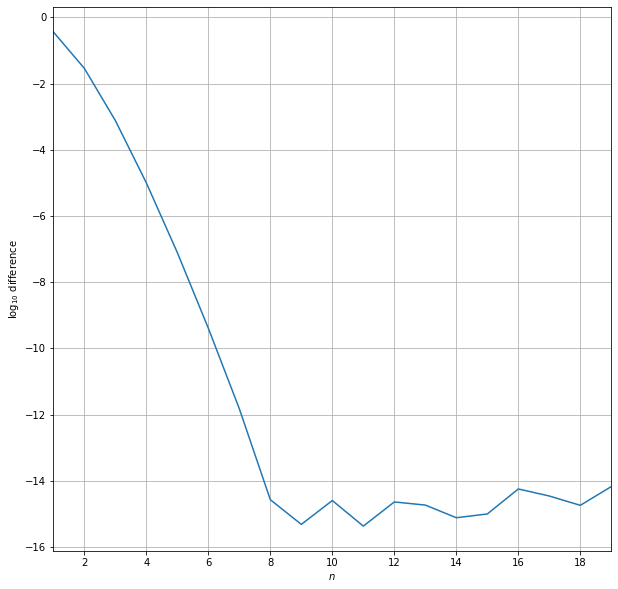

In [183]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, len(difference) + 1), np.log10(difference))
plt.grid()
plt.xlim(1, len(difference))
plt.ylabel('$\log_{10}$ difference')
plt.xlabel('$n$')
plt.show()

* Видно, что разница перестает уменьшаться при $n = 9$, поэтому остановиться логично там. 

In [184]:
roots_best, g_best = pairs(9)

### Задание 2.2

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их точное расположение.

1. Для начала, попробуйте интерполировать значения, полученные в предыдущем пункте на равномерной сетке длиной 50. Можете использовать любой метод интерполяции. Сравните интерполяцию с точным значением.

In [185]:
grid = np.linspace(0, 1, 50)

interpolation = splrep(roots_best, g_best, s=0)
function = splev(grid, interpolation, der=0)

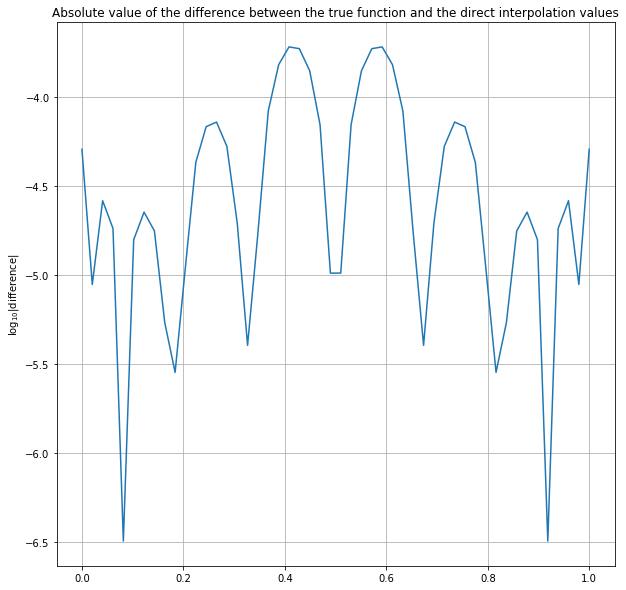

In [186]:
plt.figure(figsize=(10, 10))
plt.plot(grid, np.log10(abs(g_true(grid) - function)))
plt.title('Absolute value of the difference between the true function and the direct interpolation values')
plt.ylabel('$\log_{10}$|difference|')
plt.grid()
plt.show()

2. Теперь используйте следующую формулу, чтобы вычислить значение функции на той же равномерной сетке.

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным значением, а также с прямым интерполяционным методом.

(20% итогой оценки)

In [187]:
def g_2(x, f):
    n = f.shape[0]
    roots, w = roots_sh_legendre(n)
    return g_1(x) + ((w / 2) @ f)

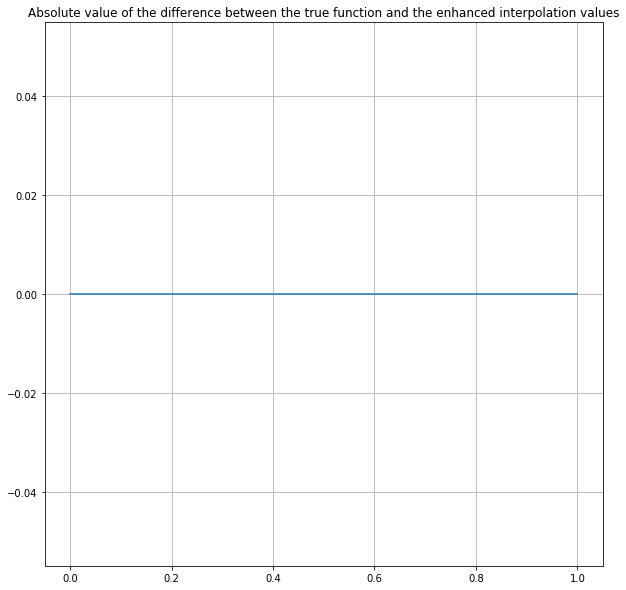

In [188]:
plt.figure(figsize=(10, 10))
plt.plot(grid, abs(g_true(grid) - g_2(grid, g_best)))
plt.title('Absolute value of the difference between the true function and the enhanced interpolation values')
plt.grid()
plt.show()

In [189]:
abs(g_true(grid) - g_2(grid, g_best))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

* По всей видимости, ошибка оказалась меньше точности ```double```, ну и хорошо.

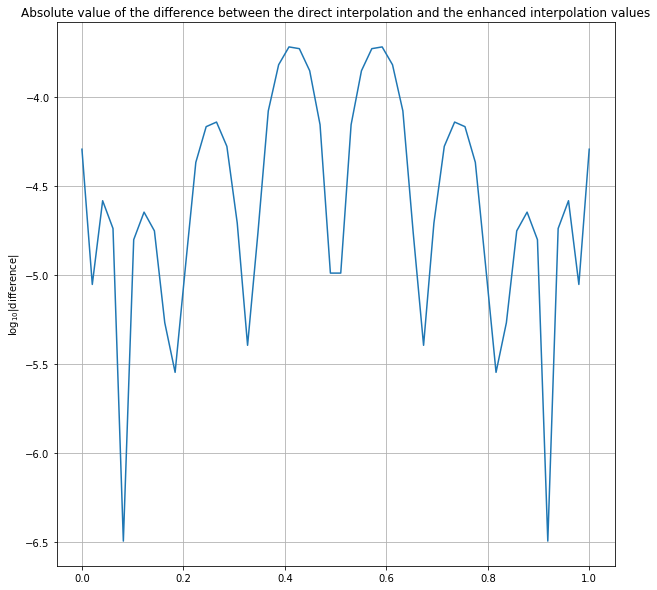

In [190]:
plt.figure(figsize=(10, 10))
plt.plot(grid, np.log10(abs(function - g_2(grid, g_best))))
plt.title('Absolute value of the difference between the direct interpolation and the enhanced interpolation values')
plt.ylabel('$\log_{10}$|difference|')
plt.grid()
plt.show()